# Go-to-Market (G2M) insight for Cab Investment firm

## Introduction

### The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market (G2M) strategy they want to understand the market before making final decision.

### Objective

Provide actionable insights to help XYZ firm in identifying the right company for making
investment.

### Data

We have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – This file includes details of transaction for 2 cab companies

**City.csv** – This file contains list of US cities, their population and number of cab users

**Customer_ID.csv** – This is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – This is a mapping table that contains transaction to customer mapping and payment mode

### Questions to Analyse

- Which cab company has had the most rides over the years?

- Which cab company has made more profit over the years?

- What is the average profit per ride for each company?

- Which cab company has higher-income users?

- Which age group is most popular with each cab company?

- How have users made payment over the years?

- What is the average kilometre travelled per ride for each company?

- Which cab company has the most users in each city?

- When is the highest demand for cab services?

## Exploratory Data Analysis (EDA)

#### Import libraries

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

#### Import and read datasets

In [2]:
cab_data = pd.read_csv("Cab_Data.csv")
city_data = pd.read_csv("City.csv")
customer_data = pd.read_csv("Customer_ID.csv")
transaction_data = pd.read_csv("Transaction_ID.csv")

In [3]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [4]:
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [6]:
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


#### Check for missing values

In [7]:
cab_data.isnull().sum().sort_values(ascending = False)

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
city_data.isnull().sum().sort_values(ascending = False)

City          0
Population    0
Users         0
dtype: int64

In [9]:
customer_data.isnull().sum().sort_values(ascending = False)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [10]:
transaction_data.isnull().sum().sort_values(ascending = False)

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

#### Data types

In [11]:
# data type of cab_data
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

We can see that the data type of "Date of Travel" column in cab_data is integer instead of datetime

In [12]:
# data type of city_data
city_data.dtypes

City          object
Population    object
Users         object
dtype: object

We can see that the data type of "Population" and "Users" columns in city_data are both object instead of integer

In [13]:
# data type of customer_data
customer_data.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [14]:
# data type of transaction_data
transaction_data.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [15]:
# number of unique values in each column of cab_data
cab_data.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

In [16]:
# number of unique values in each column of city_data
city_data.nunique()

City          20
Population    20
Users         20
dtype: int64

In [17]:
# number of unique values in each column of customer_data
customer_data.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

In [18]:
# number of unique values in each column of transaction_data
transaction_data.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

#### Data manipulation

In [19]:
# convert 'Date of Travel' column in cab_data to datetime
def datefromxls(x): return datetime.fromordinal(
    datetime(1900, 1, 1).toordinal() + x - 2)


cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(datefromxls)
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [20]:
# convert data type of 'Population' and 'Users' columns in city_data to integer
city_data['Population'] = city_data['Population'].str.replace(
    ',', '').astype('int64')
city_data['Users'] = city_data['Users'].str.replace(',', '').astype('int64')
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [21]:
# merge data
final_cab_data = pd.merge(transaction_data, customer_data).merge(
    cab_data, on='Transaction ID').merge(city_data, on='City')
final_cab_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701


In [22]:
# add new "Profit" column that calculates profit for each trip
final_cab_data['Profit'] = (
    final_cab_data['Price Charged'] - final_cab_data['Cost of Trip']).round(decimals=2)
final_cab_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.32
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,281.28
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,194.65
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.67
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,253.98


In [23]:
# add new "Profit per KM" column that calculates profit per kilometre travelled for each trip
final_cab_data['Profit per KM'] = (
    final_cab_data['Profit'] / final_cab_data['KM Travelled']).round(decimals=2)
final_cab_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit per KM
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.32,1.88
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,281.28,10.74
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,194.65,4.57
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.67,0.83
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,253.98,6.98


In [24]:
# add new "Income Class" column that group each customer income class
def income_class(income):

    income_dict = {0: 'Poor or near-poor',
                   1: 'Lower-middle class',
                   2: 'Middle class',
                   3: 'Upper-middle class',
                   4: 'Rich'}

    if (income <= 32048):
        return income_dict[0]
    elif (income > 32048 and income <= 53413):
        return income_dict[1]
    elif (income > 53413 and income <= 106827):
        return income_dict[2]
    elif (income > 106827 and income <= 373894):
        return income_dict[3]
    elif (income > 373894):
        return income_dict[4]


final_cab_data['Income Class'] = (
    final_cab_data['Income (USD/Month)']*12).apply(income_class)

In [25]:
# add new "Age Group" column that group each customer age
final_cab_data['Age Group'] = pd.cut(
    final_cab_data['Age'], bins=[18, 25, 40, 60, 100], labels=['18-25', '26-40', '41-60', '60+'], include_lowest=True)
final_cab_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit per KM,Income Class,Age Group
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.32,1.88,Upper-middle class,26-40
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,281.28,10.74,Upper-middle class,26-40
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,194.65,4.57,Upper-middle class,26-40
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.67,0.83,Upper-middle class,26-40
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,253.98,6.98,Upper-middle class,26-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,51406,Cash,Female,29,6829,2018-03-03,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,418859,127001,143.62,3.74,Middle class,26-40
359388,10319775,51406,Cash,Female,29,6829,2018-04-13,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,418859,127001,23.05,6.46,Middle class,26-40
359389,10347676,51406,Card,Female,29,6829,2018-07-06,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,418859,127001,-5.85,-0.25,Middle class,26-40
359390,10358624,51406,Cash,Female,29,6829,2018-08-02,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,418859,127001,-6.09,-0.22,Middle class,26-40


In [26]:
# convert data type of "Company", "City", "Payment_Mode", "Gender", "Income Class", "Age Group" columns in final_cab_data to category
for column in ['Company', 'City', 'Payment_Mode', 'Gender', 'Income Class', 'Age Group']:

    final_cab_data[column] = final_cab_data[column].astype('category')

final_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  category      
 3   Gender              359392 non-null  category      
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  category      
 8   City                359392 non-null  category      
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  int64         
 13  Users               359392 no

### Analysis

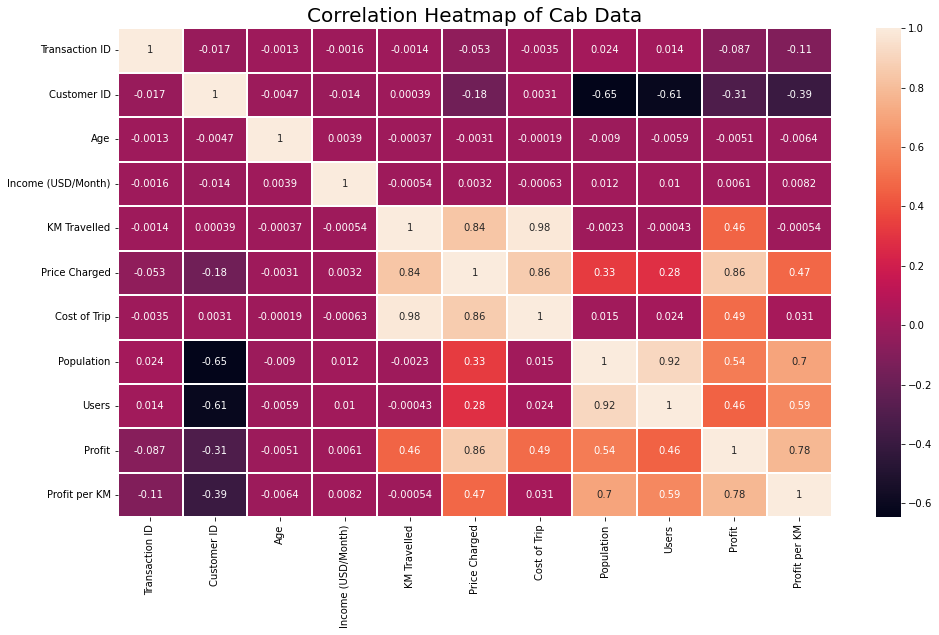

In [27]:
# plot correlation of the cab data
plt.figure(figsize=(16, 9))
plt.title('Correlation Heatmap of Cab Data', fontsize='20')

sns.heatmap(final_cab_data.corr(), xticklabels=final_cab_data.corr(
).columns, yticklabels=final_cab_data.corr().columns, annot=True, linewidth=2);

There is a strong correlation between 
- Price Charged and KM Travelled
- Cost of Trip and KM Travelled
- Cost of Trip and Price Charged
- Profit and Price Charged
- Population and Users

#### Total number of Rides

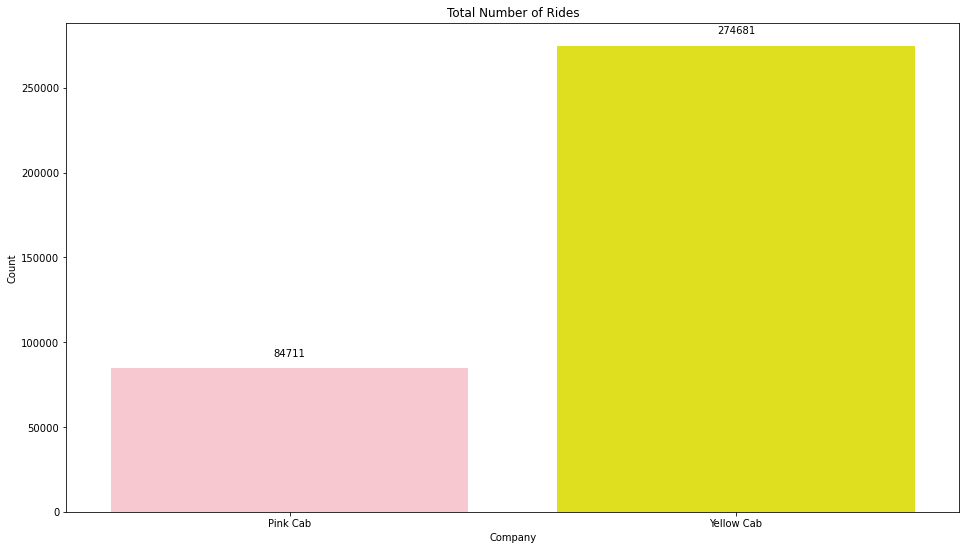

In [28]:
# plot total rides for each company 
fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.countplot(x='Company', data=final_cab_data,
                   palette=['pink', 'yellow'])
ax.set_title('Total Number of Rides')
ax.set_ylabel('Count')

for c in ax.patches:
    ax.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
                   textcoords='offset points')

Yellow Cab Company has more number of rides.

#### Profit Earned

In [29]:
# profit earned over the years
profit_table = final_cab_data.groupby(['Company']).agg(
    {'Profit': 'sum', 'Profit per KM': 'mean'}).reset_index()


def format(x): return "${:.1f}M".format(x/1000000)


profit_table['Profit'] = profit_table['Profit'].apply(format)
profit_table

,Company,Profit,Profit per KM
0,Pink Cab,$5.3M,2.769906
1,Yellow Cab,$44.0M,7.105501


Yellow Cab Company has earned more than eight times the earnings of Pink Cab Company, and Yellow Cab Company has earned more profit per kilometre travelled.

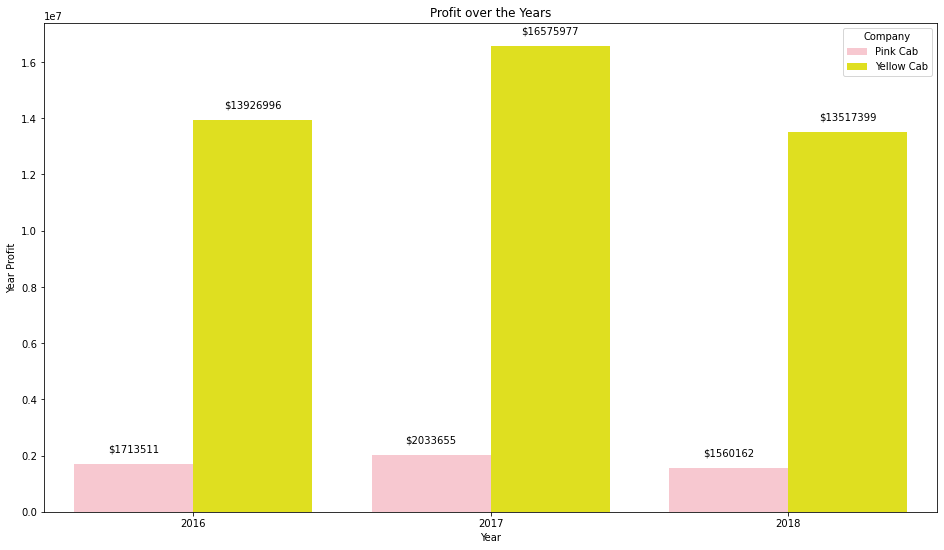

In [30]:
# extract the year from "Date of Travel" column
final_cab_data['Year'] = pd.DatetimeIndex(
    final_cab_data['Date of Travel']).year
year_profit = final_cab_data.groupby(['Year', 'Company'])[
    'Profit'].sum().reset_index(name='Year Profit')

# total profit for each year
fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.barplot(x="Year", y='Year Profit', data=year_profit,
                 hue='Company', palette=['pink', 'yellow'])
ax.set_title('Profit over the Years')
for c in ax.patches:
    ax.annotate("$%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
                textcoords='offset points')


Over time, the Yellow Cab Company has made more profit.

In [31]:
# percentage change of over the years
year_profit['Percent Change (%)'] = year_profit.groupby(
    ['Company'])[['Year Profit']].pct_change().mul(100)
year_profit

,Year,Company,Year Profit,Percent Change (%)
0,2016,Pink Cab,1713511.27,NaN
1,2016,Yellow Cab,13926996.40,NaN
2,2017,Pink Cab,2033655.24,18.683505
3,2017,Yellow Cab,16575977.40,19.020476
4,2018,Pink Cab,1560162.00,-23.282867
5,2018,Yellow Cab,13517398.79,-18.451875


Profit for both cab companies increased from 2016 to 2017, but decreased from 2017 to 2018.

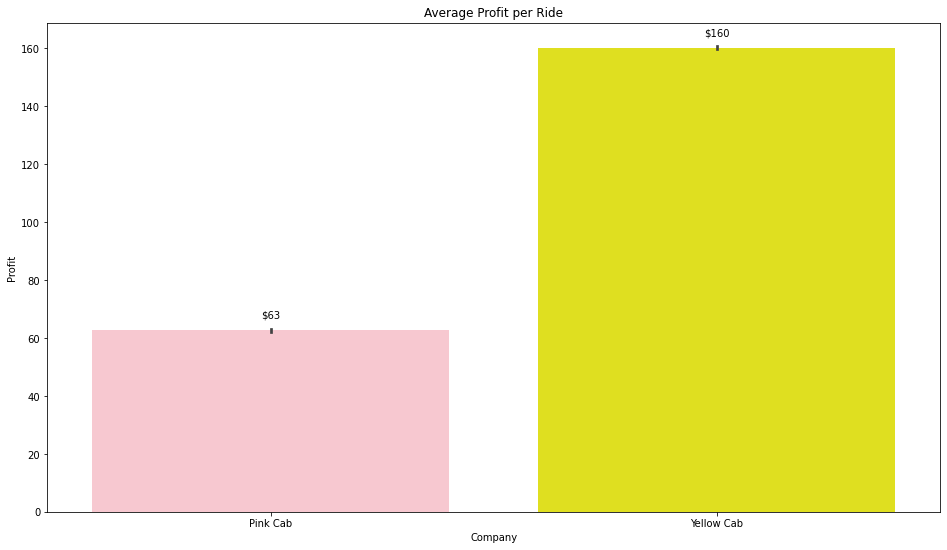

In [32]:
# average profit per ride for each company
fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.barplot(x='Company', y='Profit', data=final_cab_data,
                 palette=['pink', 'yellow'])
ax.set_title('Average Profit per Ride')
for c in ax.patches:
    ax.annotate("$%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
                textcoords='offset points')

Yellow Cab Company's average profit per ride is \\$160, while Pink Cab Company's average profit per trip is \\$63.

#### Distribution of Kilometre Travelled

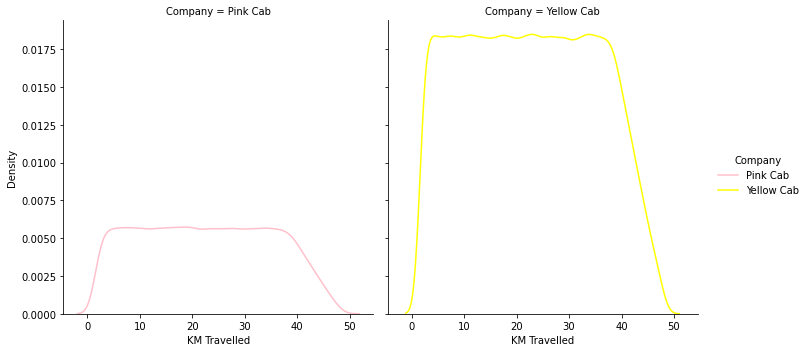

In [33]:
# distribution of kilometre travelled
ax = sns.displot(final_cab_data, x='KM Travelled', col='Company',
                 hue='Company', kind='kde', palette=['pink', 'yellow'])

#### Income Class

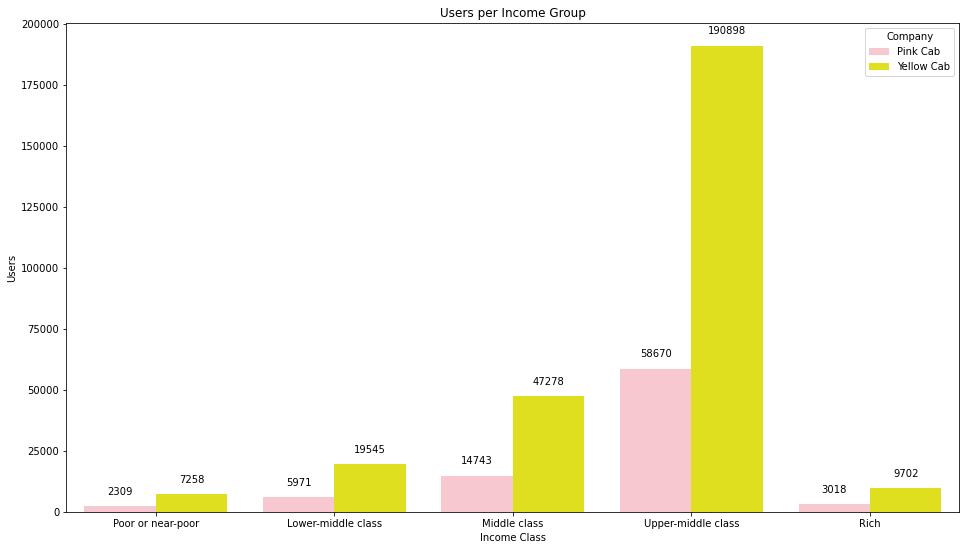

In [34]:
# number of users per income group
income_class = final_cab_data.groupby(['Company', 'Income Class'])['Users'].count().reset_index()

fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.barplot(x = 'Income Class', y = 'Users', data =income_class, hue = 'Company', palette = ['pink','yellow'], order = ['Poor or near-poor', 'Lower-middle class', 'Middle class', 'Upper-middle class', 'Rich'])

ax.set_title('Users per Income Group')
ax.set_ylabel('Users')
for c in ax.patches:
    ax.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

Yellow Cab has more users in each income class than Pink Cab.

#### Age Group Reach

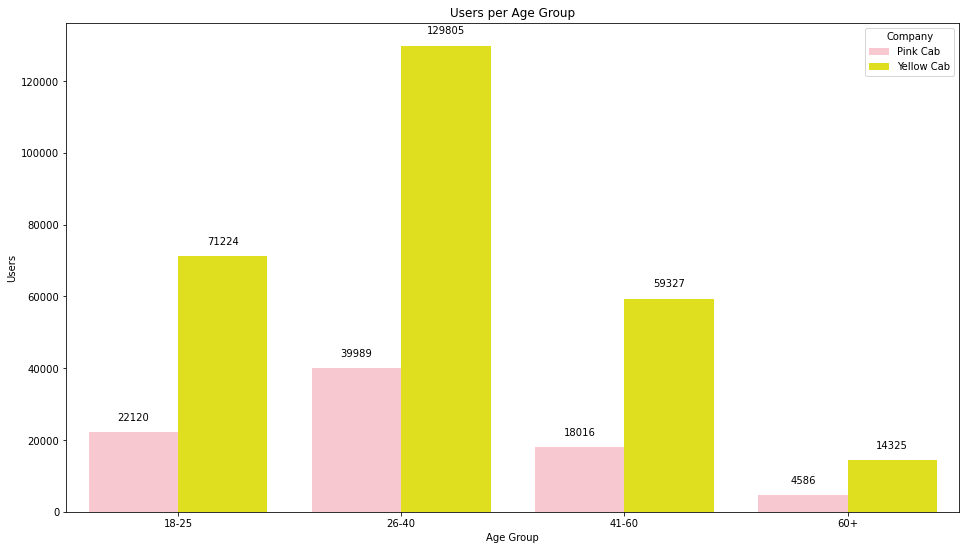

In [35]:
# number of users per age group
age_group = final_cab_data.groupby(['Company', 'Age Group'])['Users'].count().reset_index()

fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.barplot(x = 'Age Group', y = 'Users', data =age_group, hue = 'Company', palette = ['pink','yellow'], order = ['18-25', '26-40', '41-60', '60+'])

ax.set_title('Users per Age Group')
ax.set_ylabel('Users')
for c in ax.patches:
    ax.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
        textcoords='offset points')

Yellow Cab has more users in each age group than Pink Cab.

#### Payment Method

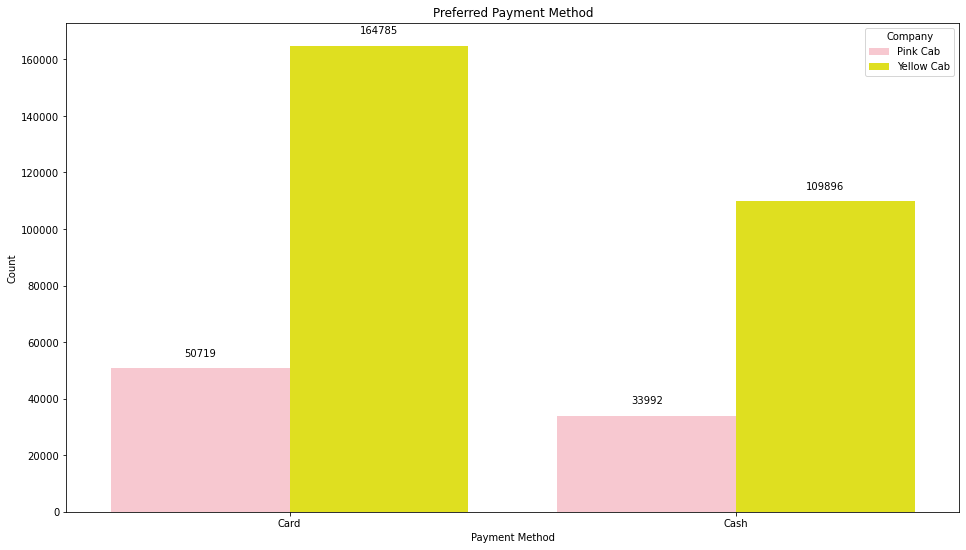

In [36]:
# plot of preferred payment method
fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.countplot(data=final_cab_data, x='Payment_Mode', hue='Company', palette = ['pink','yellow'])

ax.set_title('Preferred Payment Method')
ax.set_xlabel('Payment Method')

ax.set_ylabel('Count')
for c in ax.patches:
    ax.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
                textcoords='offset points')

Card payment is the preferred method for both cab companies.

#### Customer Reach

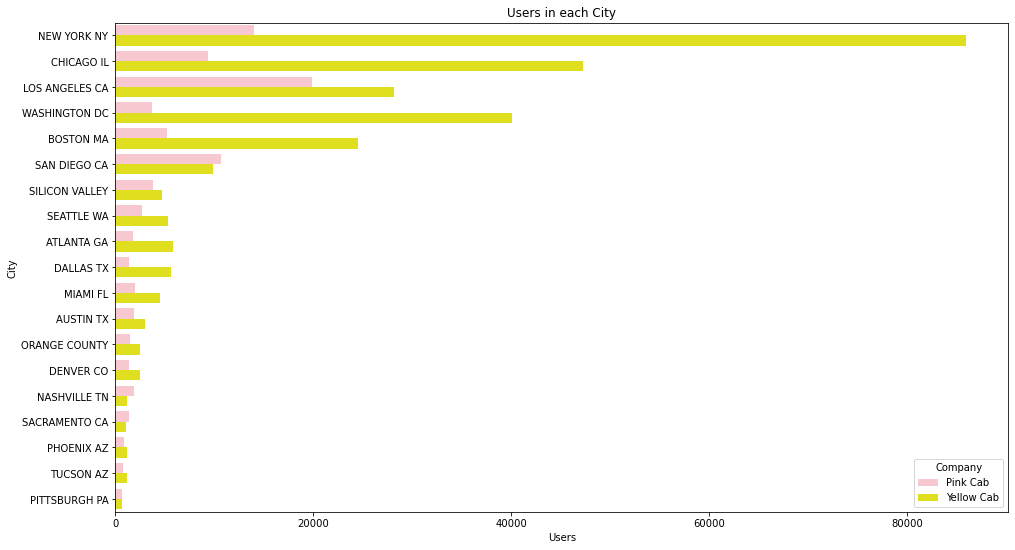

In [37]:
# plot of users in each city
city_trips = final_cab_data.groupby(['Company', 'City'])[
    'Users'].count().reset_index()
fig, ax = plt.subplots(figsize=[16, 9])
ax = sns.barplot(y='City', x='Users', data=city_trips, hue='Company', palette=['pink', 'yellow'], order=final_cab_data.groupby(
    ['City'])['Users'].count().reset_index().sort_values('Users', ascending=False).City)

ax.set_xlabel('Users')
ax.set_title('Users in each City');

Yellow Cab outnumbers Pink Cab in the Top 5 cities with the most users.

#### Customer Retention

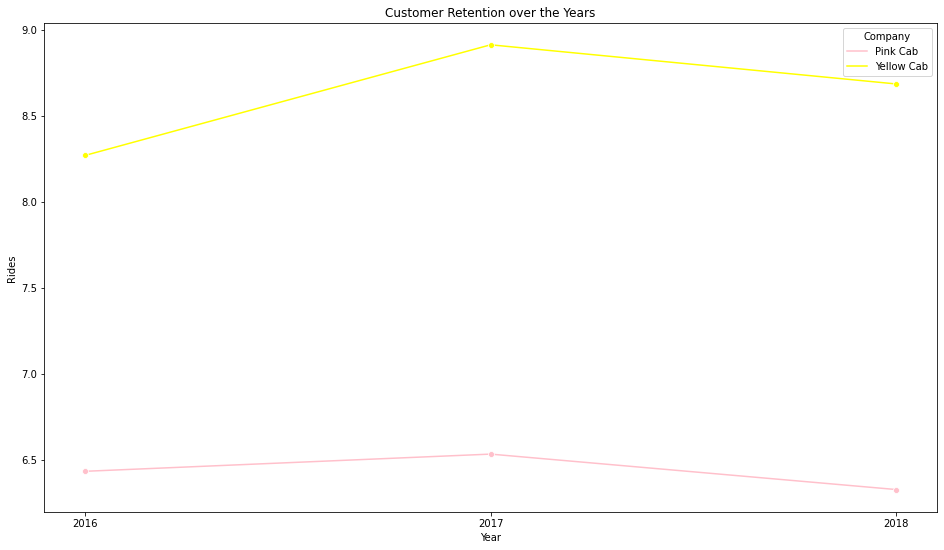

In [38]:
# plot of customer retention over the years
customer_trips = final_cab_data.groupby(['Company', 'Year','Customer ID'])['Transaction ID'].count().reset_index()
customer_trips.columns = ['Company','Year','Customer ID', 'Number of Rides']
customer_retention = customer_trips[customer_trips['Number of Rides'] > 5]

fig, ax = plt.subplots(figsize=[16, 9])
sns.lineplot(x = 'Year', y = 'Number of Rides', data = customer_retention, hue = 'Company', palette = ['pink', 'yellow'], ci=None, marker='o')
ax.set_title('Customer Retention over the Years')
ax.set_ylabel('Rides')
ax.set_xticks(customer_retention['Year'].unique());

Yellow Cab is doing a better job than Pink Cab in terms of customer retention.

In [39]:
# extract the month from "Date of Travel" column
final_cab_data['Month'] = final_cab_data['Date of Travel'].dt.month_name()
final_cab_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Profit,Profit per KM,Income Class,Age Group,Year,Month
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,57.32,1.88,Upper-middle class,26-40,2016,January
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,281.28,10.74,Upper-middle class,26-40,2018,July
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,194.65,4.57,Upper-middle class,26-40,2018,November
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,23.67,0.83,Upper-middle class,26-40,2016,January
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,253.98,6.98,Upper-middle class,26-40,2018,April


#### Monthly Rides

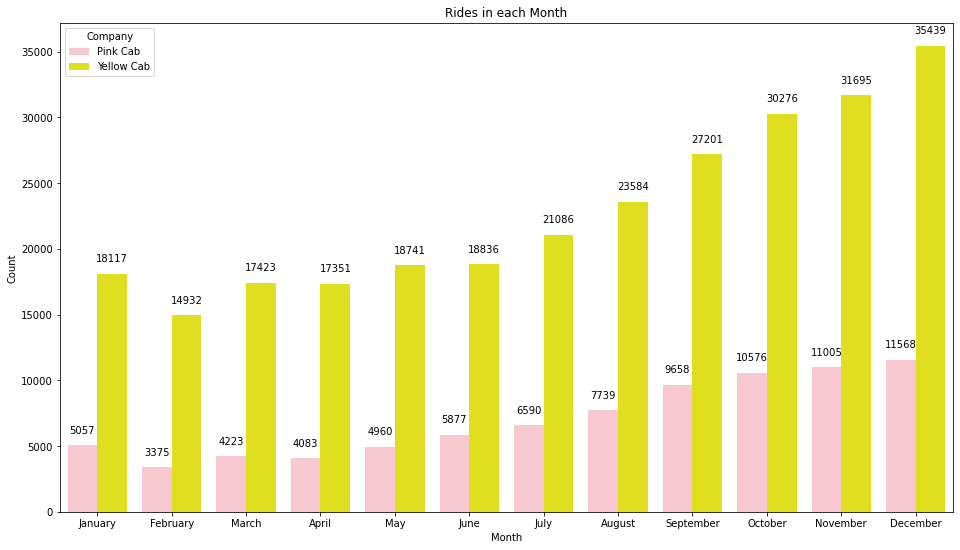

In [40]:
# plot of number of rides in each month 
month = final_cab_data.groupby(['Month', 'Company'])[
    'Transaction ID'].count().reset_index()
plt.figure(figsize=(16, 9))

ax = sns.barplot(x='Month', y='Transaction ID', hue='Company', data=month, palette=['pink', 'yellow'], order=[
                 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_title("Rides in each Month")
ax.set_ylabel("Count")
for c in ax.patches:
    ax.annotate("%.0f" % c.get_height(), (c.get_x() + c.get_width() / 2., c.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 15),
                textcoords='offset points')

There are more rides from September to December, which indicates that there is a significant demand for cabs throughout those months.

## Recommendation

**Number of Rides**: Yellow Cab company has more number of rides over the years.

**Profit**: Yellow Cab company has earned more than eight times the earnings of Pink Cab Company, and Yellow Cab Company has earned more profit per kilometre travelled.

**Income Class**: Yellow Cab company has more users in each income class than Pink Cab.

**Customer Reach**: Yellow Cab company outnumbers Pink Cab in the Top 5 cities with the most users.

**Customer Retention**: Yellow Cab is doing a better job than Pink Cab in terms of customer retention.

Based on the analysis and answered questions, we can conclude that **Yellow Cab** is a better investment option than Pink Cab.